In [66]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
import time
from pandas.io.json import json_normalize

# The plots will be style using the seaborm library.
import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

# Import a new dependency to format the dates
import matplotlib.dates as mdates

In [67]:
# Get data from Alpha Vantage using API request

# Pass the URL and state parameters
url = "https://www.alphavantage.co/query"
params = {
        "function": "TIME_SERIES_DAILY_ADJUSTED",
        "symbol": "CL",
        "outputsize": "full",
        "apikey": "ac9ba10aa04a7d"}


# Get Json response
response = requests.get(url, params=params)
data = response.json()

# Define the data columns we want passed
def df_alpha_response(data,
         columns=['Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume']):

    def results_alpha_response(d):
        # convert the response into datetimerecords that can be parsed by Pandas
        for dt, prec in d['Time Series (Daily)'].items():
            r = { 'date': dt}
            r.update(prec)
            yield r
               
    oil_df = pd.DataFrame(results_alpha_response(data))
    # rename the columns    
    oil_df = oil_df.rename(columns={'1. open': 'Open',
                            '2. high': 'High',
                            '3. low': 'Low',
                            '4. close': 'Close',
                            '5. adjusted close': 'AdjClose',
                            '6. volume': 'Volume'})
    oil_df['date'] = pd.to_datetime(oil_df['date'])
    oil_df.set_index('date', inplace=True)
    oil_df.sort_index(inplace=True)
    # extract the default columns
    oil_df = oil_df[columns]
    return oil_df


# Reset index
oil_df = df_alpha_response(data)
oil_df.reset_index(level=0, inplace=True)
oil_df.head()

,date,Open,High,Low,Close,AdjClose,Volume
0,1998-01-02,74.5000,74.5000,72.6900,73.2500,11.9706,451500
1,1998-01-05,74.0000,74.8800,73.2500,74.8800,12.2369,770000
2,1998-01-06,74.9400,74.9400,71.7500,71.9400,11.7565,861600
3,1998-01-07,70.2500,71.6300,69.8800,71.6300,11.7058,1125100
4,1998-01-08,71.6300,71.7500,69.3800,69.7500,11.3986,949700


In [68]:
# Convert date to datetime64
oil_df['date'] = pd.to_datetime(oil_df['date'])
oil_df.dtypes

date        datetime64[ns]
Open                object
High                object
Low                 object
Close               object
AdjClose            object
Volume              object
dtype: object

In [74]:
# Set the date an index
oil_df = oil_df.set_index('date')
oil_df.head(3)

KeyError: 'date'

In [75]:
# Add columns with year, month, and weekday name to the dataframe
oil_df['Year'] = oil_df.index.year
oil_df['Month'] = oil_df.index.month
oil_df['Weekday Name'] = oil_df.index.weekday_name

# Display a random sampling of 5 rows
oil_df.sample(5, random_state=0)

,Open,High,Low,Close,AdjClose,Volume,Year,Month,Weekday Name
date,,,,,,,,,
2004-12-16,49.85,50.06,49.25,49.90,17.9617,2998400,2004,12,Thursday
2015-03-09,69.12,69.80,69.06,69.59,63.4545,2564545,2015,3,Monday
2012-01-10,90.01,90.15,89.25,89.45,37.8846,2839600,2012,1,Tuesday
2009-03-05,57.54,58.00,55.56,56.03,22.1120,3948200,2009,3,Thursday
2009-08-06,71.69,71.73,71.02,71.50,28.5970,2860300,2009,8,Thursday


In [76]:
#For the the column values to be used in the plots, we MUST convert them into numeric values first.
# the date was converted in datatime after creating the dataframe
oil_df.Open=pd.to_numeric(oil_df.Open)
oil_df.High=pd.to_numeric(oil_df.High)
oil_df.Low=pd.to_numeric(oil_df.Low)
oil_df.Close=pd.to_numeric(oil_df.Close)
oil_df.AdjClose=pd.to_numeric(oil_df.AdjClose)
oil_df.Volume=pd.to_numeric(oil_df.Volume)
oil_df.Year=pd.to_numeric(oil_df.Year)
oil_df.Month=pd.to_numeric(oil_df.Month)

In [81]:
# Set the date an index
oil_df = oil_df.set_index('date')
oil_df.tail(12)

KeyError: 'date'

KeyError: 'date'

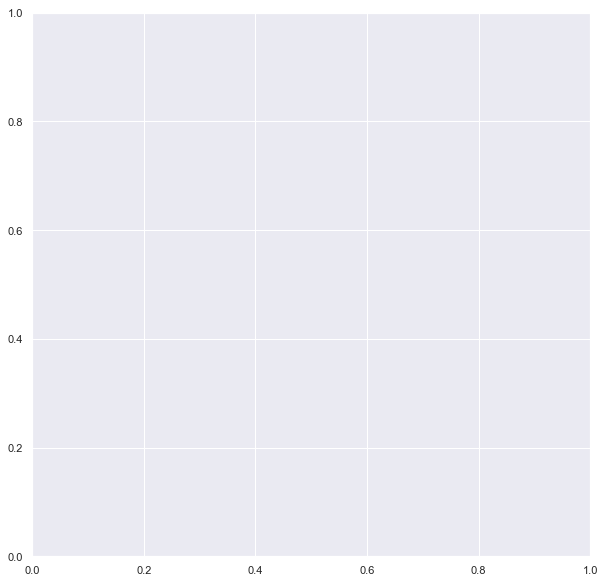

In [82]:
# create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize = (10,10))

# add the x-axis and the y-axis to the plot
ax.plot(oil_df['date'], 
        oil_df['Close'], 
        color = 'red')

# rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45)

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Temperature (Fahrenheit)",
       title="Precipitation\nBoulder, Colorado in July 2018");

In [78]:
# Select the date range we want to plot (this one will be for the year 2001)
oil_df1 = oil_df[(oil_df['date'] > '2000-07-01') & (oil_df['date'] < '2000-09-30')]
oil_df2 = oil_df[(oil_df['date'] > '2001-07-01') & (oil_df['date'] < '2001-09-30')]
oil_comb = [oil_df1, oil_df2]
oil_full = pd.concat(oil_comb)
oil_full

KeyError: 'date'

In [79]:
result = pd.concat(oil_df1,
                 oil_df2[['date', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume']],
                 on='date', 
                 how='left')
result

TypeError: concat() got an unexpected keyword argument 'on'

In [40]:
oil_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 881 to 939
Data columns (total 7 columns):
date        59 non-null datetime64[ns]
Open        59 non-null float64
High        59 non-null float64
Low         59 non-null float64
Close       59 non-null float64
AdjClose    59 non-null float64
Volume      59 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 3.7 KB


ValueError: cannot copy sequence with size 63 to array axis with dimension 7

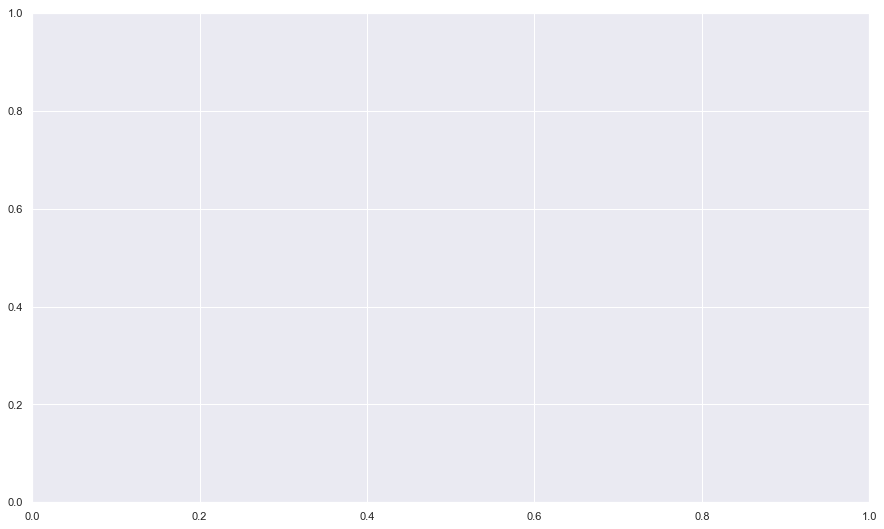

In [41]:
import matplotlib.pyplot as plt
sales1 = [oil_df1]
sales2 = [oil_df2]
line_chart1 = plt.plot(range(1,59), sales1)
line_chart2 = plt.plot(range(1,59), sales2)
plt.title('Monthly sales of 2016 and 2017')
plt.xlabel('Sales')
plt.ylabel('Month')
plt.legend(['year 2016', 'year 2017'], loc=4)
plt.show()

Populating the interactive namespace from numpy and matplotlib


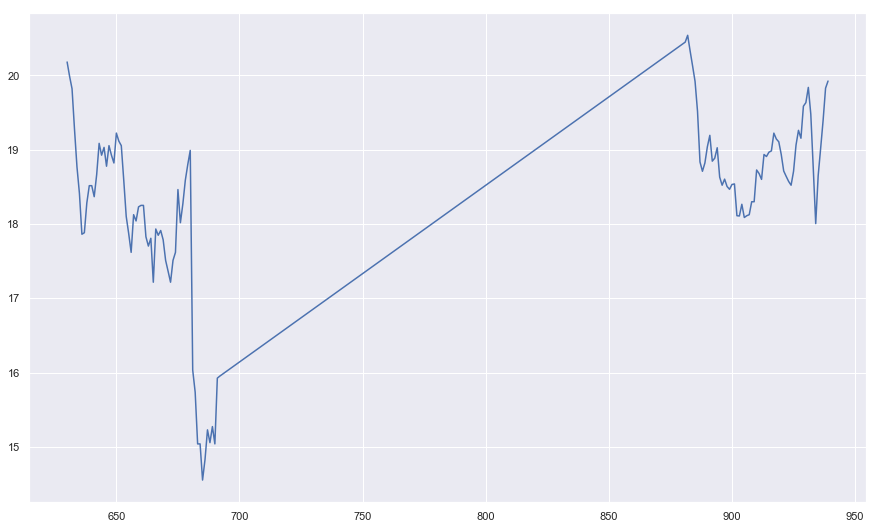

In [36]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
oil_full["AdjClose"].plot(grid = True) # Plot the adjusted closing price of AAPL

# # Set x-axis major ticks to weekly interval, on Mondays
# ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

# Format x-tick labels as 3-letter month name and day number
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

## Weekly Line Plot - Crude Oil Stocks Comparison 07/00 - 09/00 & 07/01 - 09/01 

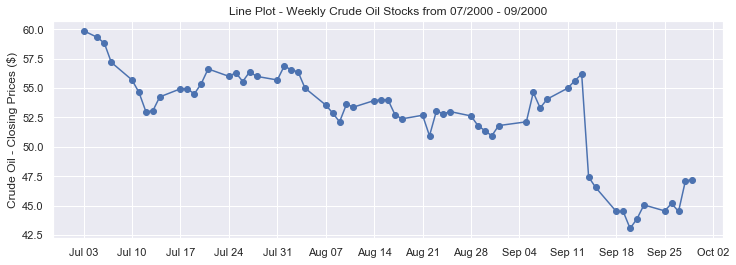

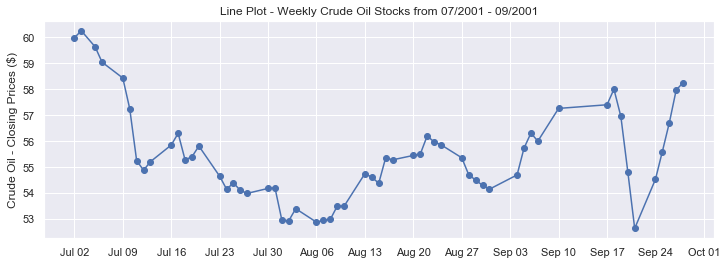

In [87]:
# Visually display side by side the two line plots

#Using the dataframes generated above we'll create a weekly line plot
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(oil_df.loc['2000-07-01':'2000-09-30', 'Close'], marker='o', linestyle='-')
# ax.plot(oil_df.loc['2000-07-01':'2000-09-30', 'AdjClose'], marker='o', linestyle='-')
ax.set_ylabel('Crude Oil - Closing Prices ($)')
ax.set_title('Line Plot - Weekly Crude Oil Stocks from 07/2000 - 09/2000')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

#-----------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(oil_df.loc['2001-07-01':'2001-09-30', 'Close'], marker='o', linestyle='-')
ax.set_ylabel('Crude Oil - Closing Prices ($)')
ax.set_title('Line Plot - Weekly Crude Oil Stocks from 07/2001 - 09/2001')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

The line plot for the year 2000 illustrates stability in crude oil stocks, however, there is a sharp decline in mid September. While the 2001 plot, when compared to the prior year, appears less stable.

-----------------------------------------------------------------------------------

## Plot with Resampling and Rolling Mean

We will resample the data to a weekly mean time series

In [8]:
# Specify the data columns we want to include
data_columns = ['Open', 'Close', 'AdjClose', 'Volume']

# Resample to weekly frequency, aggregating with mean
oil_df_weekly_mean = oil_df[data_columns].resample('W').mean()
oil_df_weekly_mean.head()

,Open,Close,AdjClose,Volume
date,,,,
1998-01-04,74.500,73.25,11.970600,451500.0
1998-01-11,71.964,71.24,11.642080,1100520.0
1998-01-18,68.600,69.04,11.282560,1273480.0
1998-01-25,70.110,69.89,11.432725,909625.0
1998-02-01,70.902,71.50,11.731100,1019180.0


In [9]:
print(oil_df.shape[0])
print(oil_df_weekly_mean.shape[0])

5324
1105


#### Line Plot with Frequency and Resampling Functions - Crude Oil 07/2001 - 09/2001

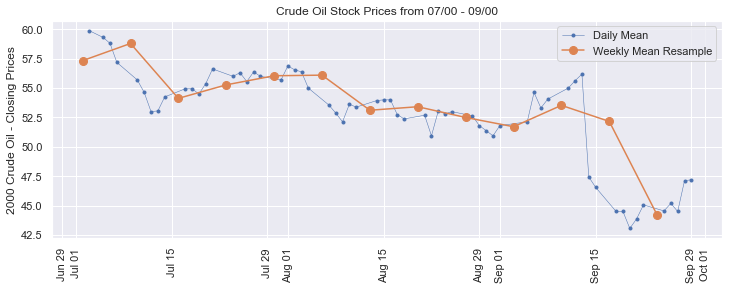

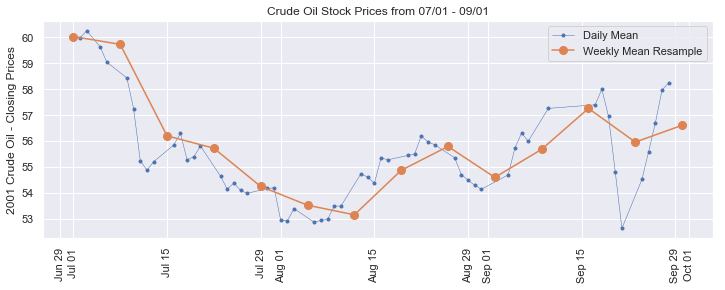

In [10]:
# Start and end of the date range to extract
start, end = '2000-07', '2000-09'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(oil_df.loc[start:end, 'Close'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily Mean')

ax.plot(oil_df_weekly_mean.loc[start:end, 'Close'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.set_ylabel('2000 Crude Oil - Closing Prices')
ax.set_title('Crude Oil Stock Prices from 07/00 - 09/00')
ax.legend();

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
# Rotate the labels at 90 angle when overlapping occur
plt.xticks(rotation=90)
plt.show()

#--------------------------------------------------------------------------------

# Start and end of the date range to extract
start, end = '2001-07', '2001-09'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(oil_df.loc[start:end, 'Close'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily Mean')

ax.plot(oil_df_weekly_mean.loc[start:end, 'Close'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.set_ylabel('2001 Crude Oil - Closing Prices')
ax.set_title('Crude Oil Stock Prices from 07/01 - 09/01')
ax.legend();

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
# Rotate the labels at 90 angle when overlapping occur
plt.xticks(rotation=90)
plt.show()

The weekly mean is smoother that the daily mean because of higher date frequency.

---------------------------------------------------------------------------------

#### Line Plot with Frequency, Resampling and Rolling Mean Functions - Crude Oil 07/2001 - 09/2001

In [11]:
# Create a new dataframe centered on the 7-day rolling mean
oil_df_7day = oil_df[data_columns].rolling(7, center=True).mean()
oil_df_7day.head(10)

,Open,Close,AdjClose,Volume
date,,,,
1998-01-02,NaN,NaN,NaN,NaN
1998-01-05,NaN,NaN,NaN,NaN
1998-01-06,NaN,NaN,NaN,NaN
1998-01-07,71.652857,71.047143,11.610571,1.043586e+06
1998-01-08,70.732857,70.297143,11.488000,1.150714e+06
1998-01-09,69.911429,69.520000,11.361000,1.280214e+06
1998-01-12,69.125714,69.127143,11.296800,1.307171e+06
1998-01-13,69.090000,68.992857,11.274857,1.301900e+06
1998-01-14,68.937143,69.180000,11.305443,1.282314e+06


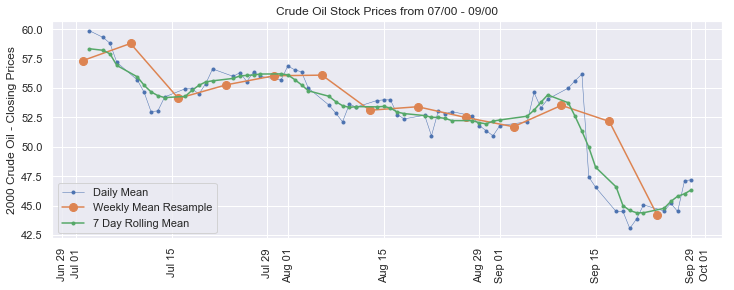

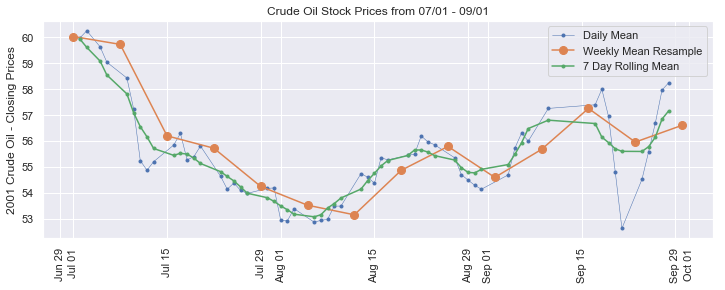

In [12]:
# Start and end of the date range to extract
start, end = '2000-07', '2000-09'

# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(oil_df.loc[start:end, 'Close'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily Mean')

ax.plot(oil_df_weekly_mean.loc[start:end, 'Close'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.plot(oil_df_7day.loc[start:end, 'Close'],
        marker='.', linestyle='-', label='7 Day Rolling Mean')

ax.set_ylabel('2000 Crude Oil - Closing Prices')
ax.set_title('Crude Oil Stock Prices from 07/00 - 09/00')
ax.legend();

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
# Rotate the labels at 90 angle when overlapping occur
plt.xticks(rotation=90)
plt.show()
#-------------------------------------------------------------------------------

# Start and end of the date range to extract
start, end = '2001-07', '2001-09'

# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(oil_df.loc[start:end, 'Close'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily Mean')

ax.plot(oil_df_weekly_mean.loc[start:end, 'Close'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.plot(oil_df_7day.loc[start:end, 'Close'],
        marker='.', linestyle='-', label='7 Day Rolling Mean')

ax.set_ylabel('2001 Crude Oil - Closing Prices')
ax.set_title('Crude Oil Stock Prices from 07/01 - 09/01')
ax.legend();

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
# Rotate the labels at 90 angle when overlapping occur
plt.xticks(rotation=90)
plt.show()

The trend line reveals that oil prices reached a sharp decline in the months prior to 9-11. And it remained flat for several years after.

--------------------------------------------------------------------------------

#### Rolling Means Trends plot - Crude Oil 07/2001 - 09/2001

In [13]:
# The min_periods=360 argument accounts for a few isolated missing days in the
# Open and AdjClose Prices time series

oil_df_365d = oil_df[data_columns].rolling(window=365, center=True, min_periods=360).mean()

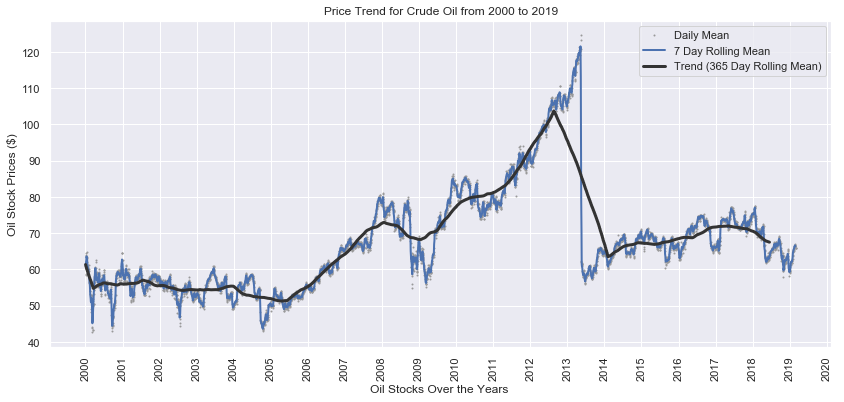

In [14]:
# Start and end of the date range to extract
start, end = '2000', '2019'

# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(oil_df.loc[start:end, 'Close'], marker='.', markersize=2, color='0.6',
        linestyle='None', label='Daily Mean')

ax.plot(oil_df_7day.loc[start:end, 'Close'], linewidth=2, label='7 Day Rolling Mean')

ax.plot(oil_df_365d.loc[start:end, 'Close'], color='0.2', linewidth=3,
        label='Trend (365 Day Rolling Mean)')

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Oil Stocks Over the Years ')
ax.set_ylabel('Oil Stock Prices ($)')
ax.set_title('Price Trend for Crude Oil from 2000 to 2019')
# Rotate the labels at 90 angle when overlapping occur
plt.xticks(rotation=90)
plt.show();

The trend line reveals that oil prices were on a steady climb from 2000 through 2013, with several ups and downs in between. But the sharp decline of 2013 has remained flat since.